# Experiments wiht lab color space

In [1]:
from matplotlib import pyplot as plt
from numpy.random import randn
%matplotlib inline
import numpy as np
from skimage import color

from src import color_blending_operator
from src import hierarchic_blending_operator
from src import color_converter
from src import color_operations
from src import color_schemes
from src import picture_worker
from src import helper

In [2]:
x_min, x_max = -10, 10
y_min, y_max = -10, 10
size = 200

mu_x_1 = 0
mu_y_1 = 0
mu_variance_x_1 = 3
mu_variance_y_1 = 15
gaussian_1 = (mu_x_1,mu_variance_x_1,mu_y_1,mu_variance_y_1)
mu_x_2 = 3
mu_y_2 = 3
mu_variance_x_2 = 4
mu_variance_y_2 = 4
gaussian_2 = (mu_x_2,mu_variance_x_2,mu_y_2,mu_variance_y_2)
mu_x_3 = -2
mu_y_3 = -1
mu_variance_x_3 = 7
mu_variance_y_3 = 7
gaussian_3 = (mu_x_3,mu_variance_x_3,mu_y_3,mu_variance_y_3)

In [3]:
X, Y, Z = helper.get_gaussian(x_min,x_max,y_min,y_max,*gaussian_1,size)
X_1, Y_1, Z_1 = helper.get_gaussian(x_min,x_max,y_min,y_max,*gaussian_2,size)
X_2, Y_2, Z_2 = helper.get_gaussian(x_min,x_max,y_min,y_max,*gaussian_3,size)
Z_color, Z_alpha = picture_worker.get_colorgrid(Z,color_schemes.matplotlib_colorschemes,10,colorscheme="PuBu")
Z_color_1, Z_alpha_1 = picture_worker.get_colorgrid(Z_1,color_schemes.matplotlib_colorschemes,10,colorscheme="OrRd")
Z_color_2, Z_alpha_2 = picture_worker.get_colorgrid(Z_2,color_schemes.matplotlib_colorschemes,10,colorscheme="RdPu")

## RGB for comparisson

(-0.5, 199.5, 199.5, -0.5)

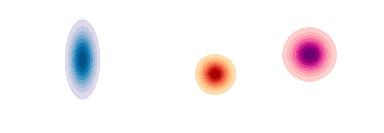

In [4]:
fig, (ax_0, ax_1, ax_2) = plt.subplots(1,3)

# displays an image
ax_0.imshow(Z_color)
ax_0.axis("off")
ax_1.imshow(Z_color_1)
ax_1.axis("off")
ax_2.imshow(Z_color_2)
ax_2.axis("off")

Nothing was converted
Nothing was converted


(-0.5, 199.5, 199.5, -0.5)

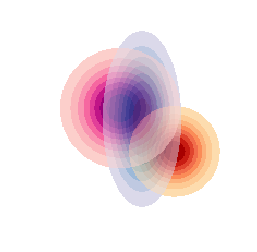

In [5]:
mixed_rgb = picture_worker.combine_two_images(color_blending_operator.porter_duff_source_over, Z_color,Z_color_1,alpha=0.5)
mixed_rgb = picture_worker.combine_two_images(color_blending_operator.porter_duff_source_over, mixed_rgb,Z_color_2,alpha=0.5)
plt.imshow(mixed_rgb)
plt.axis("off")

## Porter Duff without weights

In [66]:
def lab_color_operator_porter_duff(color_1, color_2, alpha):
    new_color = color_1.copy()
    new_color[1] = color_1[1]*alpha + color_2[1]*(1-alpha)
    new_color[2] = color_1[2]*alpha + color_2[2]*(1-alpha)
    new_color[0] = color_1[0]*alpha + color_2[0]*(1-alpha)
    return new_color

In [67]:
mixed = picture_worker.combine_two_images(lab_color_operator_porter_duff, Z_color,Z_color_1, color_space="lab", alpha=0.5)
kartoffel = picture_worker.combine_two_images(lab_color_operator_porter_duff, mixed, Z_color_2 , color_space="lab",alpha=0.5)

(-0.5, 199.5, 199.5, -0.5)

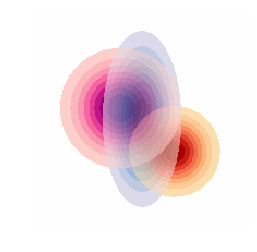

In [68]:
plt.imshow(kartoffel)
plt.axis("off")

## Choose always the minimum

In [9]:
def lab_color_operator_min(color_1,color_2, alpha):
    return np.array([np.minimum(color_1[i], color_2[i]) for i in range(len(color_1))])

In [10]:
mixed_lab = picture_worker.combine_two_images(lab_color_operator_min, Z_color,Z_color_1,alpha=0.5, color_space = "lab")

In [12]:
mixed_lab = picture_worker.combine_two_images(lab_color_operator_min, mixed_lab,Z_color_2,alpha=0.5, color_space = "lab")

(-0.5, 199.5, 199.5, -0.5)

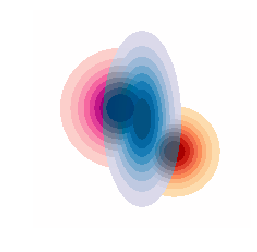

In [13]:
plt.imshow(mixed_lab)
plt.axis("off")

## Porter Duff weighted

In [58]:
def lab_color_operator_weighted(color_1, z_1, color_2, z_2):
    new_color = color_1.copy()
    if z_1 < z_2:
        new_color[0] = color_2[0]
    alpha = z_1 / (z_1 + z_2)
    new_color[1] = color_1[1]*alpha + color_2[1]*(1-alpha)
    new_color[2] = color_1[2]*alpha + color_2[2]*(1-alpha)
    return new_color, max(z_1,z_2)

In [61]:
mixed, z_new = picture_worker.combine_two_images_hierarchic(lab_color_operator_weighted ,Z_color, Z, Z_color_1, Z_1, color_space="lab")

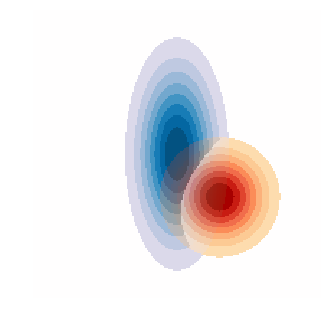

In [62]:
plt.imshow(mixed)
plt.axis("off")
plt.subplots_adjust(0, 0, 1, 1)

In [63]:
mixed, z_new = picture_worker.combine_two_images_hierarchic(lab_color_operator_weighted ,mixed , z_new, Z_color_2, Z_2, color_space="lab")

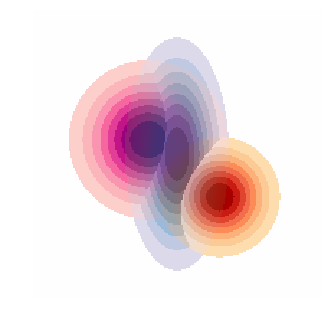

In [64]:
plt.imshow(mixed)
plt.axis("off")
plt.subplots_adjust(0, 0, 1, 1)